In [261]:
import datetime as dt
import re
import pandas as pd


def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False


def get_high_reps(s):
    if "," in s:
        reps = [float(x) for x in s.split(",")]
        return float(max(reps))

    elif "x" in s:
        return float(s.split("x")[-1])

    else:
        return float(s)


# import data from notes and put it in a list
with open("data/liftingpostcovid.txt", "r") as data:
    rawNotes = [(line.strip()).split() for line in data]
rawNotes = [x for x in rawNotes if x]

curr_date = dt.datetime.strptime("1/1/20", "%m/%d/%y")

data = []
for row in rawNotes:
    lift = []
    weight = None
    reps = None
    notes = []
    try:
        for val in row:
            if "/" in val and len(row) == 1:
                curr_date = dt.datetime.strptime(val, "%m/%d/%y")
                day = True
                break
            elif re.fullmatch(r"^\D*$", val):
                lift.append(val.lower())

            elif containsNumber(val) and ',' not in val and not weight:
                _ = re.sub(r"\D", "", val)
                weight = float(_)

            elif containsNumber(val) and ":" not in val and not reps:
                reps = min(get_high_reps(val), 15)
            else:
                notes.append(val)
        lift = " ".join(lift)
        if notes:
            notes = " ".join(notes)
        else:
            notes = None
        data.append((curr_date, lift, weight, reps, notes))
    except Exception as e:
        print(row, e)

df = pd.DataFrame(data, columns=["date", "lift", "weight", "high_reps", "notes"])
df['high_reps'] = df['high_reps'].fillna(0)
df["e1rm"] = round(df["weight"] * (36 / (37 - df["high_reps"])), 1)


print(df.loc[df.lift == "pullups"].tail(5))


['Curls', '65', '10ish'] could not convert string to float: '10ish'
['Bench', '245', '1,', 'cg', '145'] could not convert string to float: ''
['Bar', 'holds', '2x30s', '85lbs'] could not convert string to float: '85lbs'
['Bar', 'holds', '95lbs', '2x30s', 'Russian', 'twist', '10', '3x35', 'Rear', 'delt', 'flyes'] could not convert string to float: '30s'
['Deadlift', 'week', '2', '365max'] could not convert string to float: ''
['Bar', 'holds', '35', 'lbs', '2x17sec'] could not convert string to float: '17sec'
['Rows', '125x8,', 'OHP', '125', '3x4'] could not convert string to float: '125x8'
['Squat', '275', '4x5?'] could not convert string to float: '5?'
['Pin', 'press', '220/225', '3-5', 'reps', '5', 'sets'] could not convert string to float: '3-5'
['Cg', '175', '5,', '5,6'] could not convert string to float: ''
['OHP', '145,', '105', '4x6'] could not convert string to float: ''
['Front', 'raises', '40', '3x10ish'] could not convert string to float: '10ish'
['Bar', 'holds', '105', '20,2

In [262]:
df = df.loc[~(df.lift == '')].copy()
df['weight'] = df['weight'].fillna(0)
df

,date,lift,weight,high_reps,notes,e1rm
1,2015-09-07,squat,245.0,1.0,None,245.0
2,2015-09-07,deadlift,195.0,3.0,None,206.5
3,2015-09-07,pullups,77.0,0.0,None,74.9
5,2015-09-08,front squat,195.0,1.0,None,195.0
6,2015-09-08,bench easy,180.0,5.0,None,202.5
...,...,...,...,...,...,...
7536,2024-06-28,curls,0.0,0.0,None,NaN
7538,2024-06-29,bench,235.0,10.0,None,313.3
7539,2024-06-29,bench,225.0,7.0,None,270.0
7540,2024-06-29,side delts,0.0,0.0,None,NaN


In [263]:
import matplotlib.pyplot as plt

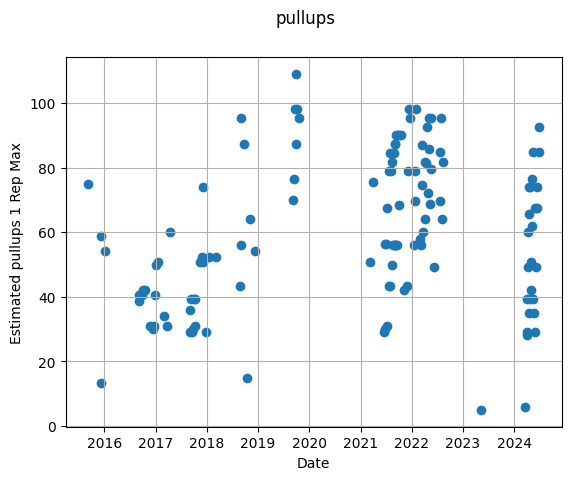

In [264]:
def plot_lift(lift_name, df):
    df = df.loc[df.lift==lift_name].copy(deep=True).reset_index(drop=True)
    plt.figure()
    plt.scatter(df['date'], df['e1rm'])
    plt.xlabel("Date")
    plt.ylabel("Estimated " + str(lift_name) + " 1 Rep Max")
    ax = plt.gca()
    n = 1  # Keeps every nth label
    [
        l.set_visible(False)
        for (i, l) in enumerate(ax.xaxis.get_ticklabels())
        if i % n != 0
    ]
    plt.grid(True)
    plt.suptitle(lift_name)
    plt.savefig(f'plots/{lift_name}_e1RM')


    #ax.table(cellText=data, colLabels=column_labels, loc="center")
    
    return

plot_lift('pullups', df)

In [265]:
df.loc[(df.lift=='pullups') & ~(df.e1rm.isna())].sort_values(by='e1rm').tail(20)

,date,lift,weight,high_reps,notes,e1rm
1584,2018-09-21,pullups,80.0,4.0,None,87.3
2106,2019-09-30,pullups,80.0,4.0,"+45 6,6",87.3
4201,2021-09-07,pullups,80.0,4.0,None,87.3
4226,2021-09-13,pullups,80.0,5.0,None,90.0
4279,2021-09-24,pullups,80.0,5.0,None,90.0
4300,2021-09-29,pullups,80.0,5.0,None,90.0
4384,2021-10-20,pullups,80.0,5.0,None,90.0
7531,2024-06-28,pullups,90.0,2.0,None,92.6
5152,2022-04-21,pullups,85.0,4.0,None,92.7
4646,2021-12-23,pullups,90.0,3.0,None,95.3


In [277]:
df.groupby('date')['lift'].value_counts().reset_index()['lift'].value_counts().reset_index().head(20)

,lift,count
0,bench,431
1,ohp,245
2,deadlift,241
3,pullups,224
4,squat,214
5,rear delts,143
6,side delts,132
7,triceps,112
8,curls,110
9,front squat,107


In [267]:
df.loc[df.lift == 'bench']

,date,lift,weight,high_reps,notes,e1rm
15,2015-09-11,bench,180.0,4.0,None,196.4
23,2015-09-14,bench,225.0,1.0,None,225.0
28,2015-09-16,bench,225.0,1.0,None,225.0
38,2015-09-18,bench,230.0,1.0,None,230.0
43,2015-09-19,bench,215.0,1.0,None,215.0
...,...,...,...,...,...,...
7510,2024-06-23,bench,245.0,7.0,None,294.0
7526,2024-06-26,bench,325.0,2.0,None,334.3
7527,2024-06-26,bench,275.0,6.0,None,319.4
7538,2024-06-29,bench,235.0,10.0,None,313.3
